In [46]:
import os

import matplotlib.pyplot as plt

import astropy.units as u

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

import pandas as pd
pd.set_option('display.max_rows', None)  # Set the maximum number of rows to display to None (which means display all rows)

In [6]:
jsoc_email = 'mohamed.nedal.solar@gmail.com'
#jsoc_email = 'mnedal@nao-rozhen.org'

result = Fido.search(a.Time("2011-03-09 23:20:00", "2011-03-09 23:30:00"),
                     a.Sample(1*u.hour),
                     a.jsoc.Series("hmi.sharp_cea_720s"),
                     a.jsoc.PrimeKey("HARPNUM", 401),
                     a.jsoc.Notify(jsoc_email),
                     a.jsoc.Segment("Bp"))
print(result)

Results from 1 Provider:

1 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

         T_REC          TELESCOP  INSTRUME WAVELNTH CAR_ROT
----------------------- -------- --------- -------- -------
2011.03.09_23:24:00_TAI  SDO/HMI HMI_SIDE1   6173.0    2107




In [7]:
file = Fido.fetch(result)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [12]:
import drms
import json, numpy as np, matplotlib.pylab as plt, matplotlib.ticker as mtick
from datetime import datetime as dt_obj
import urllib
from astropy.io import fits
from sunpy.visualization.colormaps import color_tables as ct
from matplotlib.dates import *
import matplotlib.image as mpimg
import sunpy.map
import sunpy.io
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [13]:
import drms
c = drms.Client()

In [14]:
c.series(r'hmi\.sharp_')

['hmi.sharp_720s',
 'hmi.sharp_720s_dconS',
 'hmi.sharp_720s_nrt',
 'hmi.sharp_cea_720s',
 'hmi.sharp_cea_720s_dconS',
 'hmi.sharp_cea_720s_nrt']

In [52]:
# Set a series
si = c.info('hmi.sharp_cea_720s')

In [53]:
si.keywords

,type,recscope,defval,units,note,linkinfo,is_time,is_integer,is_real,is_numeric
name,,,,,,,,,,
cparms_sg000,string,variable,compress Rice,none,,None,False,False,False,False
magnetogram_bzero,double,variable,0,none,,None,False,False,True,True
magnetogram_bscale,double,variable,0.1,none,,None,False,False,True,True
cparms_sg001,string,variable,,none,,None,False,False,False,False
bitmap_bzero,double,variable,0,none,,None,False,False,True,True
bitmap_bscale,double,variable,1,none,,None,False,False,True,True
cparms_sg002,string,variable,compress Rice,none,,None,False,False,False,False
Dopplergram_bzero,double,variable,0,none,,None,False,False,True,True
Dopplergram_bscale,double,variable,0.5,none,,None,False,False,True,True


In [17]:
# To see all the segments associated with the series hmi.sharp_cea_720s:
si.segments

,type,units,protocol,dims,note
name,,,,,
magnetogram,int,Gauss,fits,VARxVAR,Line-of-sight magnetogram in CEA projection
bitmap,char,Enumerated,fits,VARxVAR,Mask for the patch in CEA coordinates
Dopplergram,int,m/s,fits,VARxVAR,Dopplergram in CEA projection
continuum,int,DN/s,fits,VARxVAR,Intensitygram in CEA projection
Bp,int,Gauss,fits,VARxVAR,"B_phi, positive westward"
Bt,int,Gauss,fits,VARxVAR,"B_theta, positive southward"
Br,int,Gauss,fits,VARxVAR,"B_r, positive up"
Bp_err,int,Gauss,fits,VARxVAR,Standard deviation of B_phi
Bt_err,int,Gauss,fits,VARxVAR,Standard deviation of B_theta


In [18]:
keys, segments = c.query('hmi.sharp_cea_720s[377][2011.02.14_15:00:00/12h][? (QUALITY<65536) ?]', key='T_REC, USFLUX, ERRVF', seg='Br')

In [19]:
def parse_tai_string(tstr,datetime=True):
    year   = int(tstr[:4])
    month  = int(tstr[5:7])
    day    = int(tstr[8:10])
    hour   = int(tstr[11:13])
    minute = int(tstr[14:16])
    if datetime: return dt_obj(year,month,day,hour,minute)
    else: return year,month,day,hour,minute

In [20]:
t_rec = np.array([parse_tai_string(keys.T_REC[i], datetime=True) for i in range(keys.T_REC.size)])

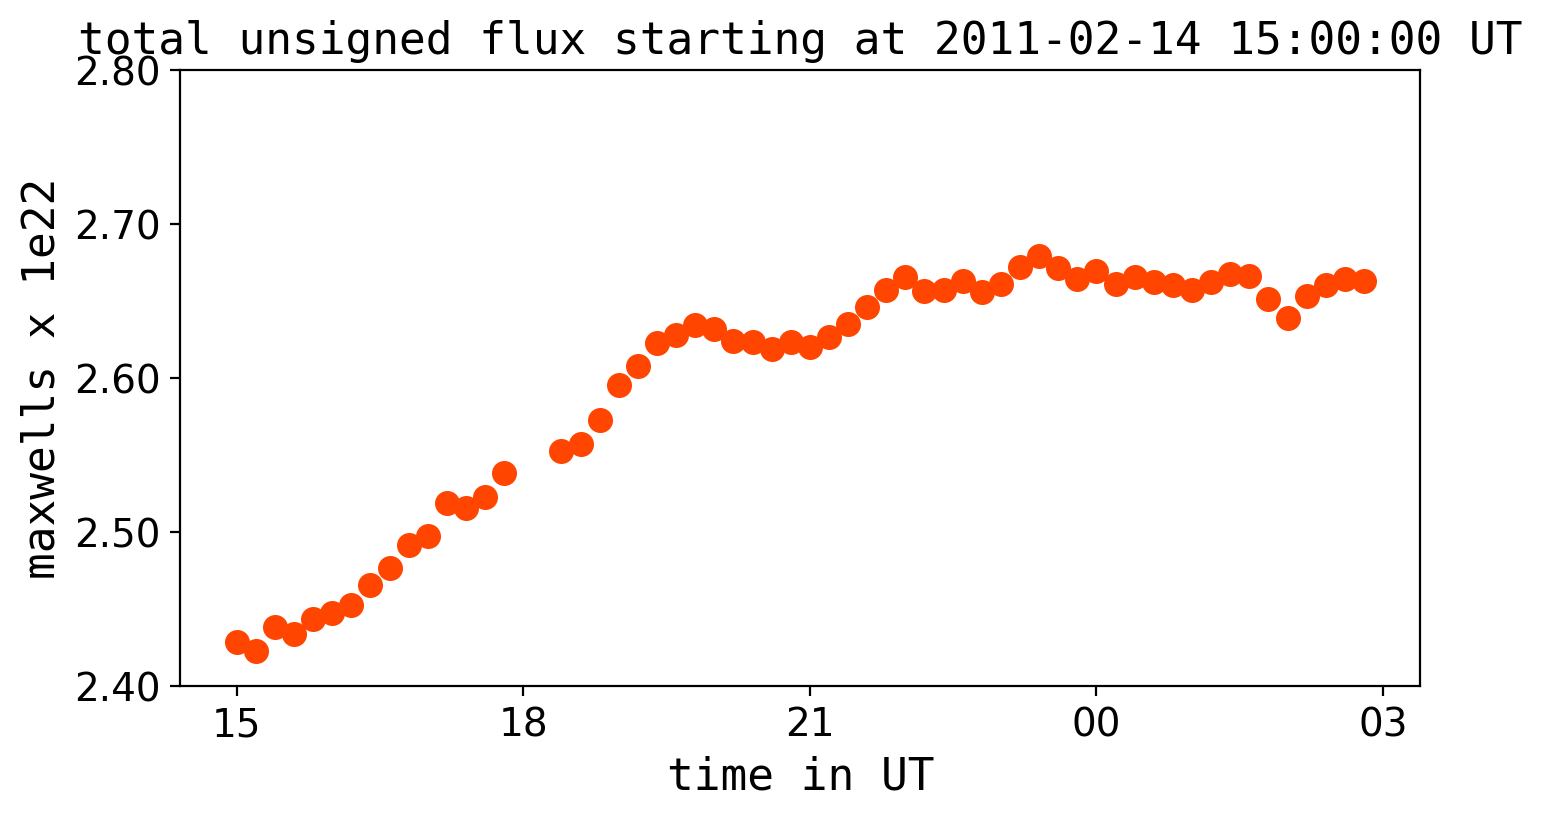

In [23]:
fig, ax = plt.subplots(figsize=(8,4))      # define the size of the figure
orangered = (1.0,0.27,0,1.0)                # create an orange-red color

# define some style elements
marker_style = dict(linestyle='', markersize=8, fillstyle='full',color=orangered,markeredgecolor=orangered)
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(t_rec, (keys.USFLUX)/(1e22),'o',**marker_style)
ax.errorbar(t_rec, (keys.USFLUX)/(1e22), yerr=(keys.ERRVF)/(1e22), linestyle='',color=orangered)

# format the x-axis with universal time
locator = AutoDateLocator()
locator.intervald[HOURLY] = [3] # only show every 3 hours
formatter = DateFormatter('%H')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# set yrange 
ax.set_ylim([2.4,2.8])

# label the axes and the plot
ax.set_xlabel('time in UT',**text_style)
ax.set_ylabel('maxwells x 1e22',**text_style)
ax.set_title('total unsigned flux starting at '+str(t_rec[0])+' UT',**text_style) # annotate the plot with a start time
plt.show()

In [24]:
keys = c.query('hmi.sharp_cea_720s[][2014.01.01 - 2016.01.01][? (CRLN_OBS < 1) AND (USFLUX > 4e22) ?]', key='T_REC, HARPNUM, USFLUX, CRLT_OBS, CRLN_OBS, AREA_ACR')

In [25]:
keys

,T_REC,HARPNUM,USFLUX,CRLT_OBS,CRLN_OBS,AREA_ACR
0,2014.05.04_14:48:00_TAI,4071,4.007906e+22,-3.818258,0.045204,1297.351685
1,2014.11.11_06:00:00_TAI,4800,4.004017e+22,3.297165,0.676486,1207.938232
2,2014.11.11_06:12:00_TAI,4800,4.023450e+22,3.295724,0.567313,1194.579590
3,2014.11.11_06:24:00_TAI,4800,4.050183e+22,3.294308,0.458156,1198.369873
4,2014.11.11_06:36:00_TAI,4800,4.070347e+22,3.292919,0.349014,1204.132935
5,2014.11.11_06:48:00_TAI,4800,4.081056e+22,3.291558,0.239885,1208.038818
6,2014.11.11_07:00:00_TAI,4800,4.094752e+22,3.290226,0.130767,1199.290039
7,2014.11.11_07:12:00_TAI,4800,4.113331e+22,3.288925,0.021658,1222.337891
8,2015.02.01_05:00:00_TAI,5127,4.801844e+22,-6.020030,0.985052,2273.071289
9,2015.02.01_05:12:00_TAI,5127,4.817782e+22,-6.020372,0.875986,2271.228516


In [26]:
keys = c.query('hmi.sharp_cea_720s[][2012.01.01 - 2018.01.01][? (N_PATCH1 > 1800) AND (T_FRST1=T_REC) ?]', key='T_REC, HARPNUM, NOAA_ARS, N_PATCH1, AREA_ACR')

In [27]:
keys

,T_REC,HARPNUM,NOAA_ARS,N_PATCH1,AREA_ACR
0,2012.07.04_03:24:00_TAI,1834,"11519,11520,11521",1820,28.082201
1,2012.07.22_21:12:00_TAI,1879,"11529,11530,11532,11533,11536",1883,24.621628
2,2012.07.30_22:24:00_TAI,1907,"11538,11539,11540,11541,11544,11545",1809,18.218309
3,2012.09.17_23:24:00_TAI,2040,"11575,11577,11583",1986,124.659348
4,2013.04.26_15:36:00_TAI,2696,"11732,11734",1846,18.187544
5,2013.06.12_17:24:00_TAI,2852,"11769,11770,11771,11772,11774,11775",1864,3.143462
6,2013.12.30_21:00:00_TAI,3563,"11943,11944",1822,2.208999
7,2014.01.17_09:00:00_TAI,3647,"11958,11959,11960,11963,11964",1813,18.883802
8,2014.02.21_04:36:00_TAI,3784,"11987,11989,11993,11994,12001",2018,30.495930
9,2014.03.14_21:24:00_TAI,3856,"12008,12010,12012,12015,12019,12023",1838,21.218081


In [28]:
keys = c.query('hmi.sharp_cea_720s[][2012.01.01 - 2014.01.01][? (R_VALUE > 5.5 AND R_VALUE < 6.0) OR (TOTUSJH >= 8900)?]', key='T_REC,HARPNUM,R_VALUE,TOTUSJH')

In [29]:
keys

,T_REC,HARPNUM,R_VALUE,TOTUSJH
0,2012.07.09_15:12:00_TAI,1834,5.249,8920.152
1,2012.07.09_15:36:00_TAI,1834,5.239,8954.800
2,2012.07.09_15:48:00_TAI,1834,5.253,8923.751
3,2012.07.09_16:00:00_TAI,1834,5.252,8902.096
4,2012.07.09_16:12:00_TAI,1834,5.251,8918.384
5,2012.07.09_16:24:00_TAI,1834,5.256,8901.315
6,2012.07.09_16:36:00_TAI,1834,5.261,8928.521
7,2012.07.09_21:12:00_TAI,1834,5.264,8907.350
8,2012.07.09_21:48:00_TAI,1834,5.271,8910.375
9,2012.07.09_22:12:00_TAI,1834,5.272,8931.835


In [30]:
hmi_query_string = 'hmi.sharp_cea_720s[377][2011.02.15_02:12:00_TAI]'
keys, segments = c.query(hmi_query_string, key='T_REC, USFLUX, ERRVF', seg='Br')
url = 'http://jsoc.stanford.edu' + segments.Br[0]   # add the jsoc.stanford.edu suffix to the segment name
photosphere_image = fits.open(url)                  # download and open the unmerged FITS file via astropy

The dimensions of this image are 377 by 744 .


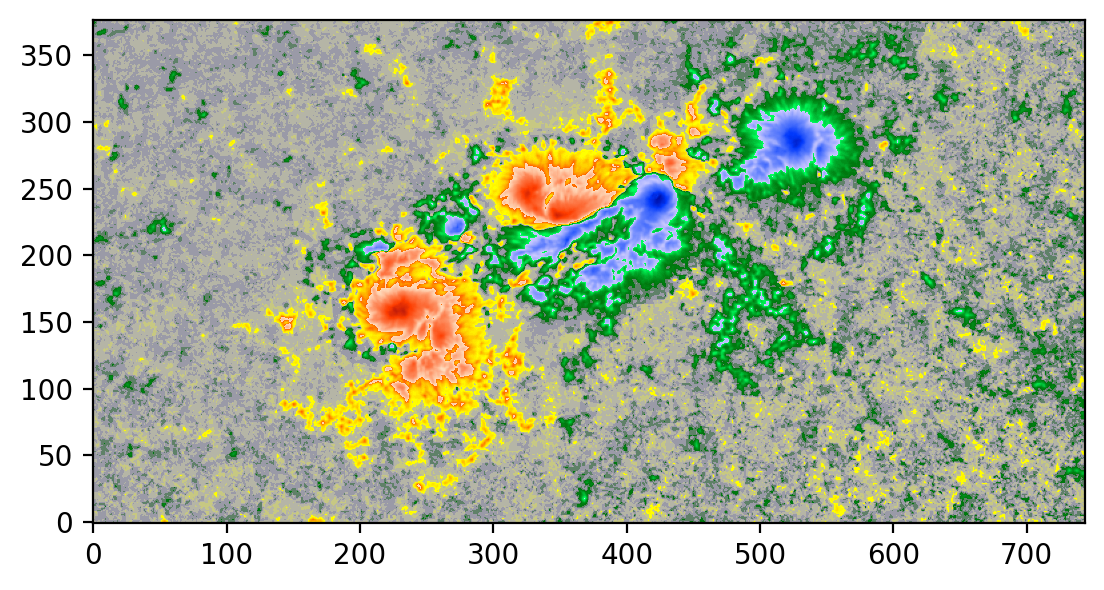

In [31]:
hmimag = plt.get_cmap('hmimag')
plt.imshow(photosphere_image[1].data,cmap=hmimag,origin='lower',vmin=-3000,vmax=3000)
print('The dimensions of this image are',photosphere_image[1].data.shape[0],'by',photosphere_image[1].data.shape[1],'.')

In [32]:
photosphere_image[1].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                  744 / length of original image axis                  
NAXIS2  =                  377 / length of original image axis                  
BLANK   =          -2147483648                                                  
CHECKSUM= 'VCJiX9GfVAGfV9Gf'   / HDU checksum updated 2018-05-10T01:45:55       
DATASUM = '1982616782'         / data unit checksum updated 2018-05-10T01:45:55 
                                                                                
                                                                                

In [38]:
email = 'mohamed.nedal.solar@gmail.com'
c = drms.Client(email=email)#, verbose=True)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [42]:
keys = c.query('hmi.sharp_cea_720s[][2014.01.01 - 2016.01.01][? (CRLN_OBS < 1) AND (USFLUX > 4e22) ?]', key='FIELD')

In [43]:
keys

,FIELD
0,Invalid KeyLink
1,Invalid KeyLink
2,Invalid KeyLink
3,Invalid KeyLink
4,Invalid KeyLink
5,Invalid KeyLink
6,Invalid KeyLink
7,Invalid KeyLink
8,Invalid KeyLink
9,Invalid KeyLink
